In [127]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [21]:
nx.__version__

'2.4'

Реализовать базовый алгоритм расстановки меток с использованием случайного блуждания. Применить его для эмперического графа, содержащего не менее 70 и не более 200 узлов.

Используя алгоритм Гирвана-Ньюмена разбить эмпирический граф на два сообщества. Выбрав два узла из разны сообществ провести случайное блуждание из этих узлов и выбрать принадлежность каждого из узлов к одному из двух сообеств по близости в результате блуждания. 

Визуализировать результаты:
* разибиения на 2 сообщества с помощью алгоритма Гирвана-Ньюмена
* результаты случайного блуждания из 1 центра
* результаты случайного блуждания из 2 центра
* резульатты выбора сообщества в результате случайного блуждания

In [332]:
g = nx.read_adjlist('mammalia-dolphin-floridatravel/mammalia-dolphin-floridatravel.edges',  create_using= nx.DiGraph())
G = g.to_undirected()
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 188
Number of edges: 1224
Average degree:  13.0213


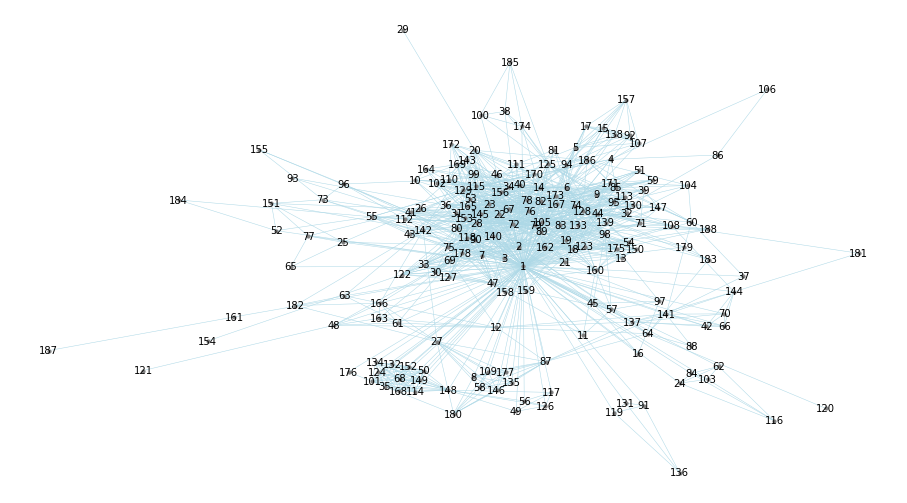

In [333]:
# визуализация
def view(G):
    plt.figure(figsize=(16,9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='grey')
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='lightblue',)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.axis('off')
    plt.show()
view(G)

In [334]:
print('количество узлов: ',len(G))

количество узлов:  188


In [335]:
G.nodes

NodeView(('1', '35', '132', '101', '134', '168', '50', '114', '148', '149', '152', '68', '124', '2', '33', '7', '72', '47', '80', '178', '118', '122', '28', '90', '30', '127', '3', '162', '105', '75', '76', '41', '23', '4', '106', '86', '5', '6', '138', '107', '15', '17', '92', '157', '94', '10', '13', '14', '18', '150', '133', '160', '164', '40', '169', '174', '175', '54', '34', '79', '81', '83', '98', '111', '139', '8', '135', '109', '177', '146', '180', '87', '58', '27', '9', '32', '130', '167', '171', '173', '113', '82', '51', '85', '59', '125', '95', '11', '57', '12', '64', '163', '69', '166', '137', '141', '48', '61', '129', '142', '145', '19', '20', '39', '115', '53', '186', '67', '71', '74', '99', '102', '147', '16', '97', '45', '158', '159', '170', '172', '110', '78', '156', '29', '21', '128', '44', '140', '89', '123', '22', '36', '165', '153', '31', '46', '24', '84', '116', '62', '103', '25', '65', '26', '77', '151', '182', '63', '143', '43', '55', '112', '108', '93', '37', '

In [336]:
G.add_node(0)
for i in [e for e in G.edges]:
    (a,b) = i
    a_int,b_int = int(a), int(b)
    G.add_node(a_int-1)
    G.add_node(b_int-1)
    G.add_edge(a_int-1, b_int-1, graph=G)
for i in [e for e in G.nodes]:
    if type(i)== str:
        G.remove_node(i)    
G.nodes

NodeView((0, 34, 131, 100, 133, 167, 49, 113, 147, 148, 151, 67, 123, 1, 32, 6, 71, 46, 79, 117, 121, 27, 89, 29, 126, 2, 161, 104, 74, 75, 40, 22, 3, 85, 4, 5, 137, 106, 14, 16, 91, 93, 9, 12, 13, 17, 149, 132, 159, 163, 39, 173, 174, 53, 33, 78, 80, 82, 97, 110, 138, 7, 134, 108, 176, 145, 86, 57, 26, 8, 31, 129, 166, 170, 112, 81, 50, 84, 58, 124, 94, 10, 56, 11, 63, 162, 68, 165, 136, 140, 47, 60, 128, 141, 144, 18, 19, 38, 114, 52, 66, 70, 73, 98, 101, 146, 15, 44, 157, 158, 169, 109, 77, 155, 20, 127, 43, 139, 88, 122, 21, 35, 164, 152, 30, 45, 23, 83, 61, 102, 24, 64, 25, 76, 62, 42, 54, 111, 107, 36, 59, 37, 99, 95, 72, 41, 143, 65, 69, 48, 55, 116, 125, 51, 103, 87, 178, 90, 130, 118, 160, 175, 177, 96, 172, 92, 153, 142, 168, 182, 154, 171, 105, 156, 185, 187, 184, 179, 181, 119, 120, 150, 28, 115, 183, 180, 135, 186))

Реализуем базовый асинхронный алгоритм расстановки меток (label propagagtion)

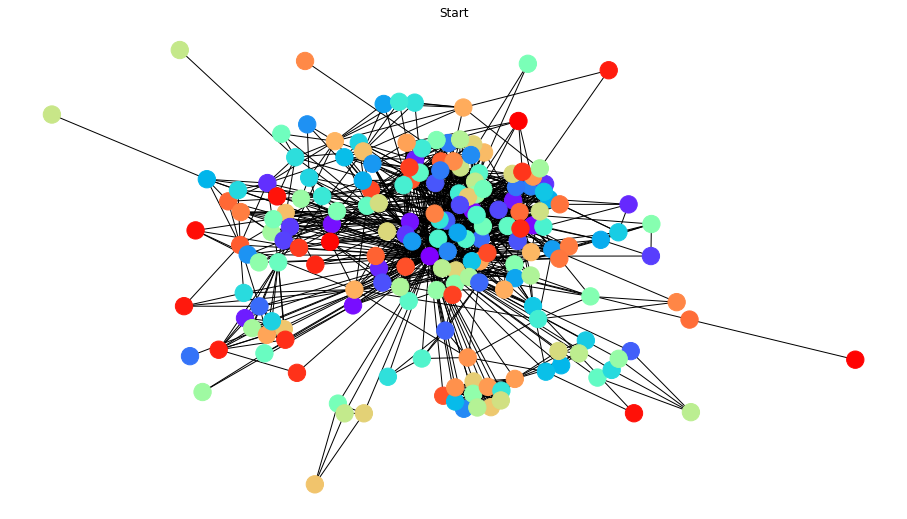

In [337]:
# Визуализация разделения на классы
def draw_classes(graph, communities,title = ''):
    rainbow = cm.rainbow(np.linspace(0, 1, max(communities.values())+1))

    node_color = [rainbow[communities[it]] for it in graph.nodes]
    plt.figure(figsize=(16,9))
    plt.title(title)
    nx.draw(graph, node_color=node_color)
    plt.show()

draw_classes(G, {i: i for i in range(len(G))}, 'Start')

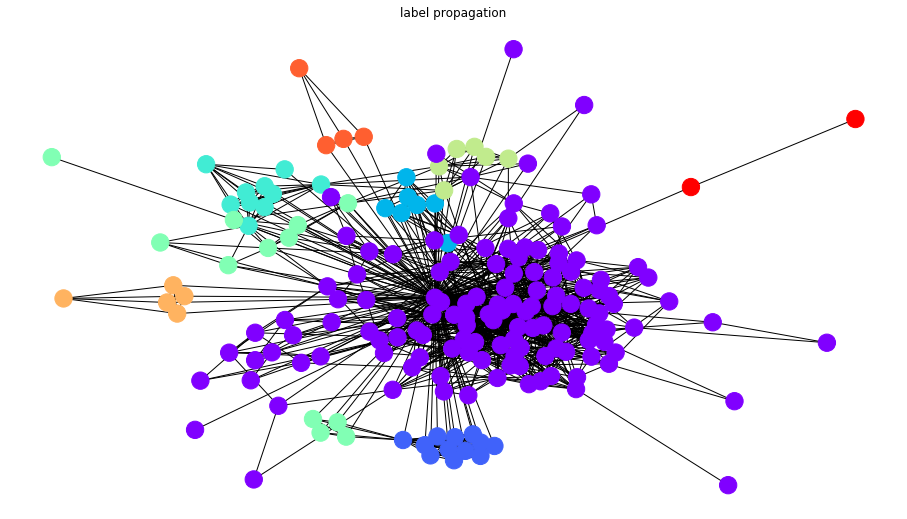

0.9665032679738562
0.37012174308795087


In [338]:
# Произведем разделение на классы с помощью расстановки меток
# Используем функцию из community.label_propagation для асинхронной расстановки меток asyn_lpa_communities
from networkx.algorithms import community
partition = community.label_propagation.asyn_lpa_communities(G, seed=np.random)

def to_community(partition): # Преобразуем в communities для визуализации
    c = list(partition)
    com = {}
    num = 0
    for i in c:
        arr = []
        for k in i:
            com[k]=num
        num+=1
    return com

draw_classes(G,to_community(partition),'label propagation')

print(community.quality.coverage(G,c))
print(community.quality.performance(G,c))

In [361]:
print(c, '\n', len(c))

from random import randint
com_st = []
k = 6
for i in range (k):
    com_st.append(set())
print(com_st, len(com_st))
for i in G.nodes:
    rand_com = randint(0, k-1)
    com_st[rand_com].add(i)
print(com_st, len(com_st))

[{0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 115, 117, 119, 120, 121, 122, 124, 126, 127, 128, 129, 132, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 177, 178, 180, 181, 182, 183, 184, 185, 187}, {34, 131, 100, 133, 67, 167, 49, 113, 147, 148, 151, 123}, {134, 7, 108, 175, 176, 145, 179, 86, 57, 26}, {48, 116, 125, 55}, {135, 90, 118, 130}, {160, 186}] 
 6
[set(), set(), set(), set(), set(), set()] 6
[{0, 129, 9, 138, 14, 142, 16, 17, 158, 170, 45, 48, 52, 182, 58, 63, 64, 75, 76, 81, 85, 94, 110, 121, 122,

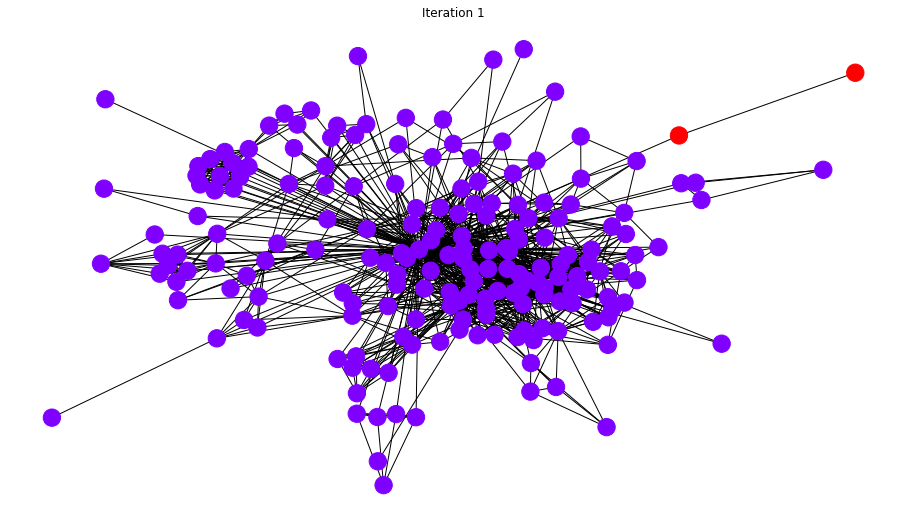

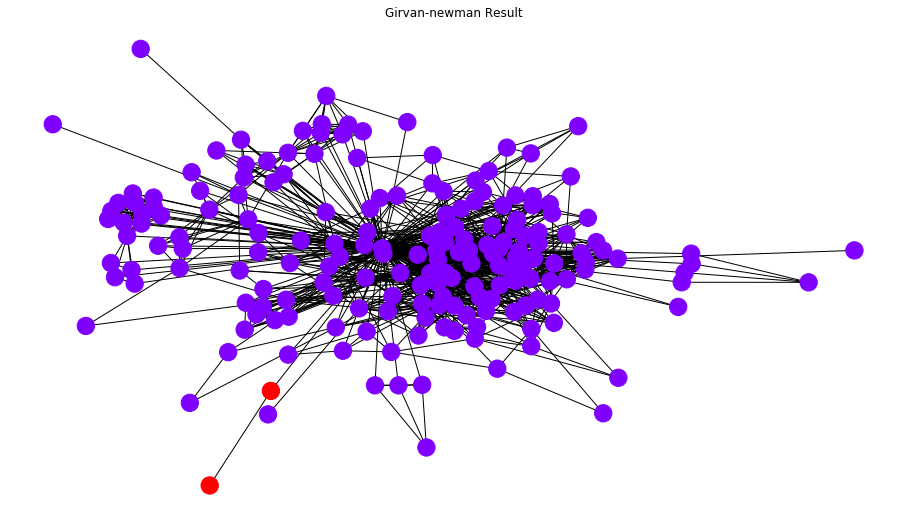

In [342]:
# Проведем разделение на два сообщества с помощью алгоритма Гирван-Ньюмана. (girvan_newman(G))
from networkx.algorithms import community
import itertools

def k_comm_girvan_newman(G, k):
    comp = community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    i=1
    for communities in limited:
        pre = tuple(sorted(c) for c in communities)
        draw_classes(G, to_community(pre),f'Iteration {i}')
        i+=1
    draw_classes(G,to_community(pre),'Girvan-newman Result')

k_comm_girvan_newman(G, 2)

4